[Reference](https://medium.com/mlearning-ai/cross-validation-techniques-for-machine-learning-a-guide-to-improve-model-performance-8748d46281cc)

# Hold Out Method

In [2]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.12.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["Target"] = boston.target
df.head()
print(df.shape) #(506, 14)

(506, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [2]:
X = boston.data
y = boston.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [3]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
estimator = xgb.XGBRegressor(objective ='reg:squarederror', seed = 10)
estimator.fit(X_train, y_train)

# Predict the model
y_pred = estimator.predict(X_test)

# RMSE Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: % f" %(rmse))

RMSE:  2.628542


# K-Fold

In [4]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

print(kf)

#Generate indices to split data into training and test set.
fold_generator = kf.split(X)
print(fold_generator)

for i, (train_index, test_index) in enumerate(fold_generator):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

KFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x7af201312f80>
Fold 0:
  Train: index=[102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316

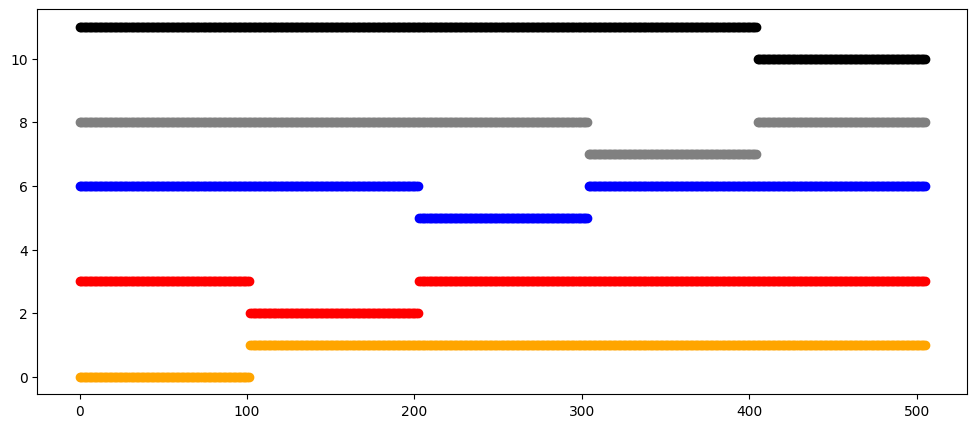

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12, 5))
colors = ["orange","red","blue","gray","black"]
counter = 0
for i, (train_index, test_index) in enumerate(kf.split(X)):
    plt.scatter(train_index,np.full_like(train_index, counter+1), c =colors[i])
    plt.scatter(test_index, np.full_like(test_index, counter), c =colors[i])
    counter += 2.5
plt.show()

In [6]:
import xgboost as xgb
estimator = xgb.XGBRegressor(seed=10)

scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    estimator.fit(X_train, y_train)
    scores.append(estimator.score(X_test, y_test)) #returns r2

# scores
print(scores)
print(np.mean(scores))

[0.7512186285982114, 0.6741502170308569, 0.6718447751134311, 0.5139542060633732, 0.14667421945168824]
0.5515684092515121


In [7]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(estimator , X, y, cv = kf, scoring="r2")
print(result)

[0.75121863 0.67415022 0.67184478 0.51395421 0.14667422]


In [9]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor()

# hyperparameter grid
param_grid = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3]}

grid_search = GridSearchCV(model, param_grid, cv=kf)
grid_search.fit(X, y)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 3}


In [10]:
import pandas as pd
df = pd.DataFrame(grid_search.cv_results_)
print(df)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.047976      0.028159         0.001297        0.000084   
1       0.070619      0.002763         0.001407        0.000040   
2       0.149420      0.005765         0.001531        0.000092   
3       0.034152      0.003147         0.001312        0.000041   
4       0.070397      0.002484         0.001472        0.000068   
5       0.140212      0.010015         0.001501        0.000053   
6       0.035781      0.002786         0.001697        0.000624   
7       0.071174      0.004869         0.001493        0.000123   
8       0.135206      0.010772         0.002638        0.002292   

  param_learning_rate param_max_depth                                  params  \
0                 0.1               3  {'learning_rate': 0.1, 'max_depth': 3}   
1                 0.1               5  {'learning_rate': 0.1, 'max_depth': 5}   
2                 0.1               7  {'learning_rate': 0.1, 'max_depth': 7}   
3    

# Stratified K-Fold

In [11]:
mport numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

X = data.drop(['Class'], axis=1)
y = data['Class']

skf = StratifiedKFold(n_splits=5)
estimator = xgb.XGBClassifier(seed=10)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f"Fold Distribution of Train: {np.bincount(y_train)} - Test: {np.bincount(y_test)}")

In [12]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

X = data.drop(['Class'], axis=1)
y = data['Class']

skf = StratifiedKFold(n_splits=5)
estimator = xgb.XGBClassifier(seed=10)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(classification_report(y_test, y_pred))

In [13]:
from sklearn.model_selection import cross_val_score
estimator = xgb.XGBClassifier(seed=10)
result = cross_val_score(estimator , X, y, cv = skf, scoring="accuracy")
print(result)

In [14]:
from sklearn.model_selection import GridSearchCV
estimator = xgb.XGBClassifier(seed=10)
skf = StratifieadKFold(n_splits=5)
# hyperparameter grid
param_grid = {'max_depth': [3, 5], 'learning_rate': [0.1, 0.2]}
grid_search = GridSearchCV(estimator, param_grid, cv=skf)
grid_search.fit(X, y)
print(grid_search.best_params_)
#{'learning_rate': 0.2, 'max_depth': 5}

import pandas as pd
df = pd.DataFrame(grid_search.cv_results_)
print(df)

# Leave One Out

In [15]:
#Let's go back to the Boston dataset

from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
fold_generator = loo.split(X)
for i, (train_index, test_index) in enumerate(fold_generator):
    print(f"Fold {i}:")
    print(f"  Train: index={len(train_index)}")
    print(f"  Test:  index={len(test_index)}")

Fold 0:
  Train: index=505
  Test:  index=1
Fold 1:
  Train: index=505
  Test:  index=1
Fold 2:
  Train: index=505
  Test:  index=1
Fold 3:
  Train: index=505
  Test:  index=1
Fold 4:
  Train: index=505
  Test:  index=1
Fold 5:
  Train: index=505
  Test:  index=1
Fold 6:
  Train: index=505
  Test:  index=1
Fold 7:
  Train: index=505
  Test:  index=1
Fold 8:
  Train: index=505
  Test:  index=1
Fold 9:
  Train: index=505
  Test:  index=1
Fold 10:
  Train: index=505
  Test:  index=1
Fold 11:
  Train: index=505
  Test:  index=1
Fold 12:
  Train: index=505
  Test:  index=1
Fold 13:
  Train: index=505
  Test:  index=1
Fold 14:
  Train: index=505
  Test:  index=1
Fold 15:
  Train: index=505
  Test:  index=1
Fold 16:
  Train: index=505
  Test:  index=1
Fold 17:
  Train: index=505
  Test:  index=1
Fold 18:
  Train: index=505
  Test:  index=1
Fold 19:
  Train: index=505
  Test:  index=1
Fold 20:
  Train: index=505
  Test:  index=1
Fold 21:
  Train: index=505
  Test:  index=1
Fold 22:
  Train: in

# Monte Carlo Cross Validation


In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle=ShuffleSplit(test_size=0.2,train_size=0.8,n_splits=5)
for i, (train_index, test_index) in enumerate(shuffle.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[375 149  42 156 176  10 208 505 369 276 192 197 455 444 496 416  97 117
 467 382  43 223 205 482  69  40 159 293 450 429 391 373  54 297 231 303
 259 147 325 470 153  90 174 274 195 203 381 172 389  84 160  53 338 380
  57  29 330 422  47  60 292 134  56 464 426  48 448 216 478 177 198 500
 420 109 154 221 345 346 392 165  67  91 142 278 242 173  89 167 334  17
 352 314 305  12 366 129 119 257 204 388 379 445 319  87 135 424 288 200
 184 405 140 239   6 361 141  30 281 194 275 343 182 454 313  11 224 105
 302  52 202 269 234 171 386 371 258 378 106 227 139 367   8 370 290 166
 443 145 130 358 412 209  46 473 494 294 498 132 398  55 323 264 217  39
  63  37 241 183 401 248 255 374 250  51 237  70 495 151 410  85  98 300
 307 286  83 439 440 434 108 256 354 324 336 357 425 488  22  62 282  66
 212 101  16 403 136 468 328 362  92 207 170 365 310 477 340 229 191 504
   9 137 122 301 230 266 414 113 102 409 268 384 465 501 193 383 247 321
   2 432 175  96 236  71 111

# Bootstrapping

In [17]:
import numpy as np
from sklearn.utils import resample

# the number of bootstrap samples to draw
n_iter = 100

# train test split percentage
percentage = 0.8
for i in range(n_iter):
    X_train, y_train = resample(X, y, replace=True, n_samples=int(X.shape[0]*percentage))
    X_test, y_test = resample(X, y, replace=True, n_samples=int(X.shape[0]*(1-percentage)))
    print(f"Shapes: X_train: {X_train.shape} y_train: {y_train.shape} X_test: {X_test.shape} y_test: {y_test.shape}")

Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_train: (404, 13) y_train: (404,) X_test: (101, 13) y_test: (101,)
Shapes: X_tr